

# Linear Regression
```
Y = a + mx
```


### Linear Regression (standarized)

In [1]:
import pandas as pd 
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


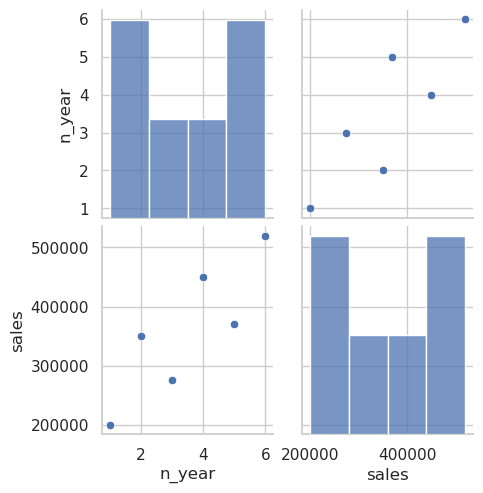

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

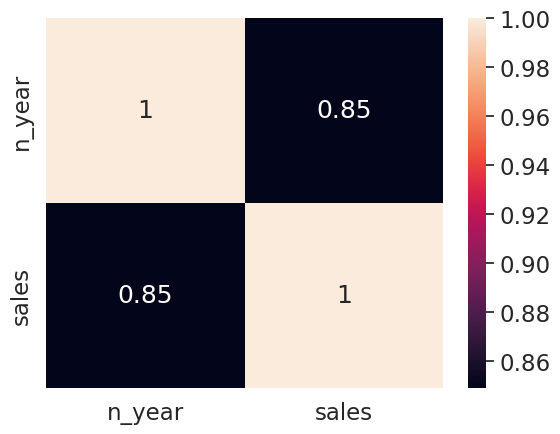

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['n_year'].values.reshape(-1, 1)
Y = df['sales'].values.reshape(-1, 1)

# Standardization involves subtracting the mean of each column from each value
# in that column and then dividing by the standard deviation of the column. 
# This ensures that each column has zero mean and unit variance.
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

slr = LinearRegression()
model_std = slr.fit(X_std, Y_std)

Text(0.5, 0, 'Year')

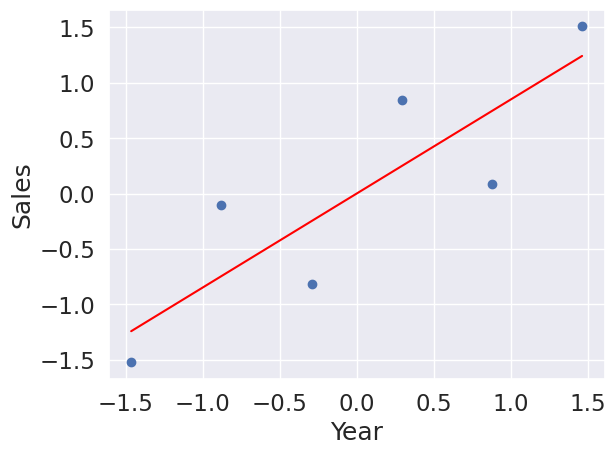

In [5]:
plt.scatter(X_std, Y_std)
plt.plot(X_std, slr.predict(X_std), color='red')
plt.ylabel('Sales')
plt.xlabel('Year')

In [6]:
n_year = 7
sales_std = sc_x.transform(np.array([n_year]).reshape(-1,1))
# sales_std = np.array([n_year]).reshape(-1,1)

print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', sc_y.inverse_transform(slr.predict(sales_std)))
# print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', slr.predict(sales_std))

la cantidad de ventas para el periodo 7 (anio 2016) es de  [[544333.33333333]]


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = model_std.score(X_std, Y_std)
mse = mean_squared_error(Y_std, slr.predict(X_std))
mae = mean_absolute_error(Y_std, slr.predict(X_std))

intercept =  model_std.intercept_[0]
coef = model_std.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept}")
print(f"Model coef: {coef[0]}")

print('\n======== Standarized equation ========')
print(f"Y = {intercept:.2f} + {coef[0]:.2f}X")

coefficient of determination R^2: 0.7209624323094628
Mean squared errror: 0.28
Mean absolute error: 0.50

interception: 1.794525663885509e-16
Model coef: 0.8490950667089423

======== Standarized equation ========
Y = 0.00 + 0.85X


### Linear Regression (original data)

In [8]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


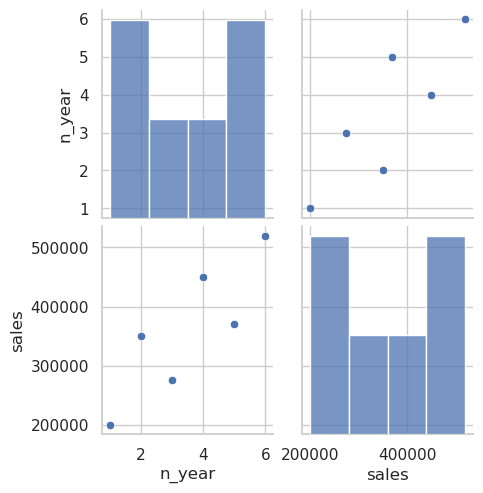

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

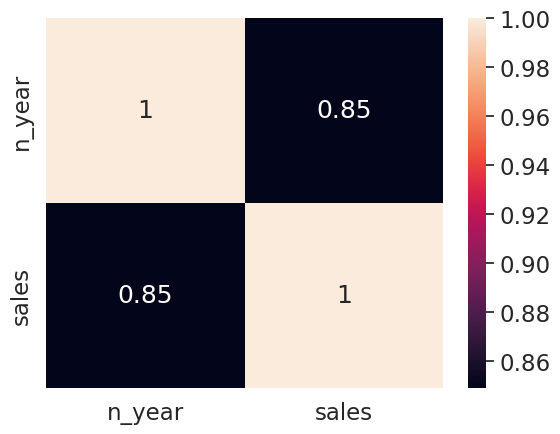

In [10]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [11]:
from sklearn.linear_model import LinearRegression

X = df['n_year'].values.reshape(-1, 1)
Y = df['sales'].values.reshape(-1, 1)
lr = LinearRegression()
model = lr.fit(X, Y)

Text(0.5, 0, 'n_Year')

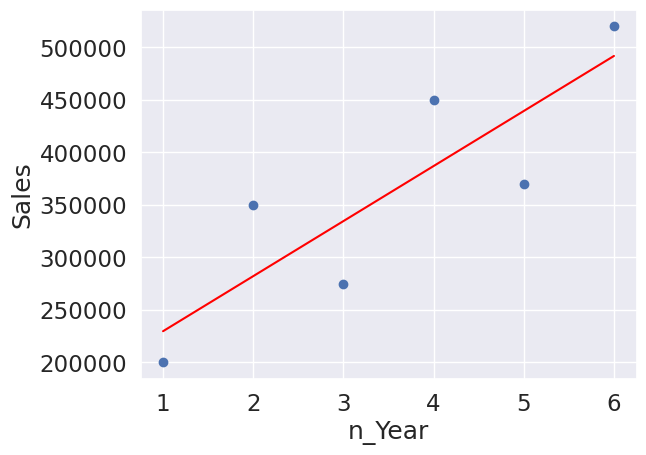

In [12]:
plt.scatter(X, Y)
plt.plot(X, lr.predict(X), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')

In [13]:
n_year = 7
sales = lr.predict(np.array(n_year).reshape(-1, 1))

print('la cantidad de ventas para el periodo 7 (anio 2016) es de ', sales)

la cantidad de ventas para el periodo 7 (anio 2016) es de  [[544333.33333333]]


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = lr.score(X, Y)
mse = mean_squared_error(Y, lr.predict(X))
mae = mean_absolute_error(Y, lr.predict(X))
intercept = lr.intercept_[0]
coef = lr.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.2f}")
print(f"Model coef: {coef[0]:.2f}")

print('\n======== Original equation ========')
print(f"Y = {intercept:.2f} + {coef[0]:.2f}X")

coefficient of determination R^2: 0.720962432309463
Mean squared errror: 3102936507.94
Mean absolute error: 52952.38

interception: 177333.33
Model coef: 52428.57

======== Original equation ========
Y = 177333.33 + 52428.57X


In [15]:
# import statsmodels.api as sm
# ols_model = sm.OLS(Y, sm.add_constant(X)).fit()
# print(ols_model.summary())


# Exponential Regression
```
Ln(y) = Ln(a) + Ln(b)X
```

In [16]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


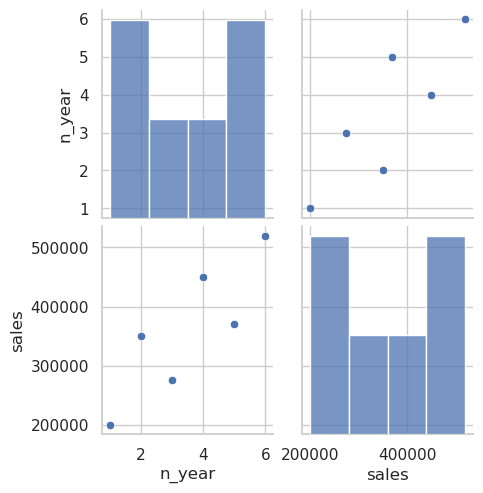

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

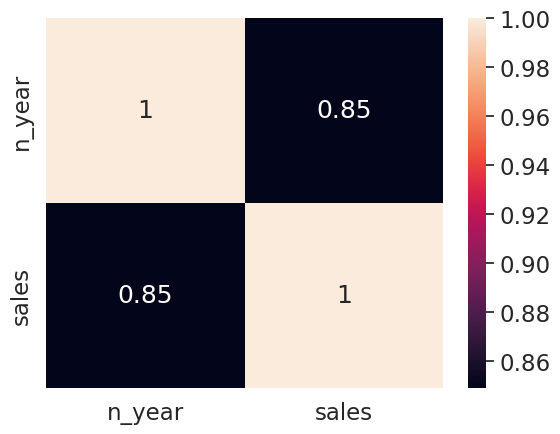

In [18]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [19]:
from sklearn.linear_model import LinearRegression

X = np.array(df['n_year']).reshape(-1, 1)
Y = np.array(df['sales']).reshape(-1, 1)

log_x = np.log(X)
log_y = np.log(Y)

model = LinearRegression()
model.fit(X, log_y)

LinearRegression()

Text(0.5, 0, 'n_Year')

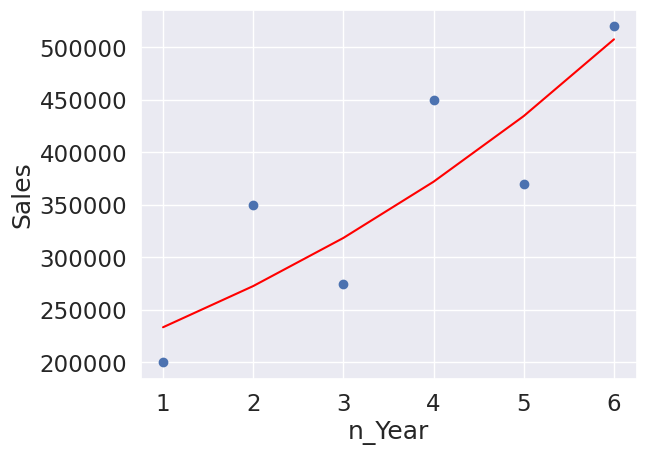

In [20]:
plt.scatter(X, Y)
plt.plot(X, np.exp(model.predict(X)), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')


In [21]:
n_year = 7

sales = model.predict(np.array(n_year).reshape(-1, 1))
print(f"la cantidad de ventas para el periodo 7 (anio 2016) es de {np.exp(sales)}")

la cantidad de ventas para el periodo 7 (anio 2016) es de [[593047.49951315]]


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = model.score(X, log_y)
mse = mean_squared_error(Y, np.exp(model.predict(X)))
mae = mean_absolute_error(Y, np.exp(model.predict(X)))

intercept = model.intercept_[0]
coef = model.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.5f}")
print(f"Model coef: {coef[0]:.5f}")

print('\n======== Original equation ========')
print(f"Log(Y) = {intercept:.5f} + {coef[0]:.5f}X")

coefficient of determination R^2: 0.7124236279757308
Mean squared errror: 3231047615.18
Mean absolute error: 51528.23

interception: 12.20568
Model coef: 0.15534

======== Original equation ========
Log(Y) = 12.20568 + 0.15534X


# Potential Regression
```
ln(Y) = ln(a) + b * ln(X)
Y = a * X^b
```

In [23]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


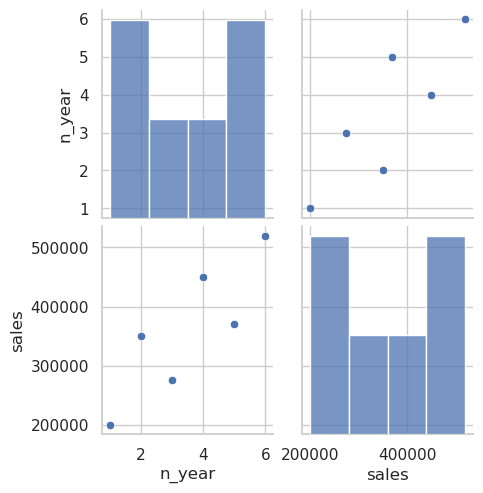

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

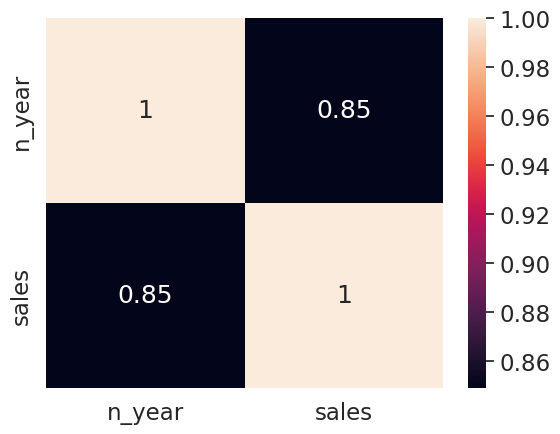

In [25]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [26]:
from sklearn.linear_model import LinearRegression

X = np.array(df['n_year']).reshape(-1, 1)
Y = np.array(df['sales'])

log_x = np.log(X)
log_y = np.log(Y)

model = LinearRegression()
model.fit(log_x, log_y)

LinearRegression()

Text(0.5, 0, 'n_Year')

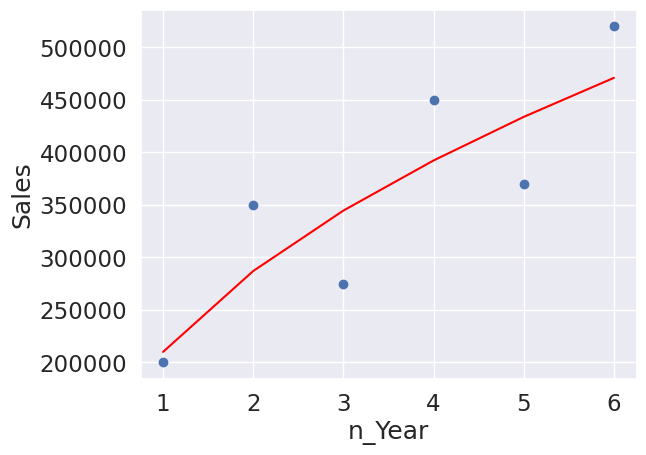

In [27]:
plt.scatter(X, Y)
plt.plot(X, np.exp(model.predict(np.log(X))), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')

In [28]:
n_year = 7

sales = model.predict(np.array(np.log(n_year)).reshape(-1, 1))
print(f"la cantidad de ventas para el periodo 7 (anio 2016) es de {np.exp(sales)}")

la cantidad de ventas para el periodo 7 (anio 2016) es de [504963.03178955]


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

r_sq = model.score(log_x, log_y)
mse = mean_squared_error(Y, np.exp(model.predict(np.log(X))))
mae = mean_absolute_error(Y, np.exp(model.predict(np.log(X))))

intercept = model.intercept_
coef = model.coef_

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared errror: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.5f}")
print(f"Model coef: {coef[0]:.5f}")

print('\n======== Original equation ========')
print(f"Log(Y) = Log({np.exp(intercept):.5f}) + {coef[0]:.5f} Log(X)")
print(f"Log(Y) = {intercept:.5f} + {coef[0]:.5f} Log(X)")
print(f"Y = {np.exp(intercept):.5f} * X^{coef[0]:.5f}")


coefficient of determination R^2: 0.7527197884867202
Mean squared errror: 3118236312.83
Mean absolute error: 52178.26

interception: 12.25505
Model coef: 0.45079

======== Original equation ========
Log(Y) = Log(210038.78892) + 0.45079 Log(X)
Log(Y) = 12.25505 + 0.45079 Log(X)
Y = 210038.78892 * X^0.45079


# Logarithmic Regression
```
Y = a + blnX
```

In [30]:
import pandas as pd
df = pd.read_excel('sales.xlsx')
df

,n_year,year,sales
0,1,2010,200000
1,2,2011,350000
2,3,2012,275000
3,4,2013,450000
4,5,2014,370000
5,6,2015,520000


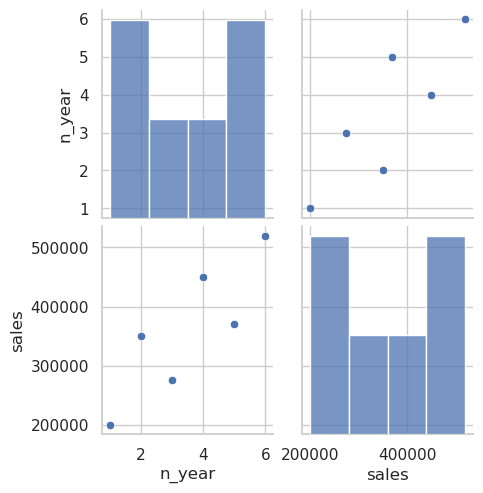

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")
cols = ['n_year', 'sales']
sns.pairplot(df[cols], height=2.5)
plt.show()

<Axes: >

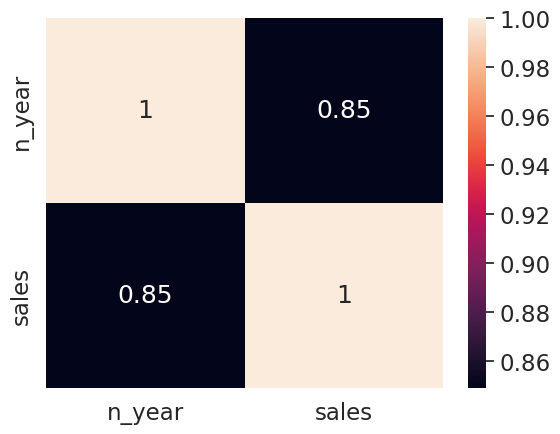

In [32]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [33]:
from sklearn.linear_model import LinearRegression

X = np.array(df['n_year']).reshape(-1, 1)
Y = np.array(df['sales']).reshape(-1, 1)    

log_x = np.log(X)

model = LinearRegression()
model.fit(log_x, Y)

LinearRegression()

Text(0.5, 0, 'n_Year')

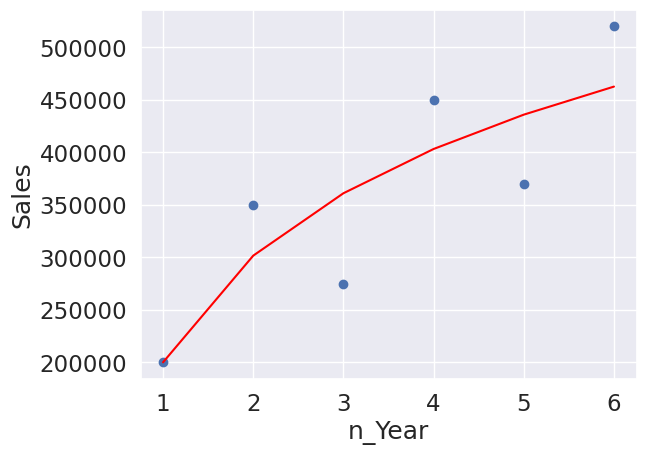

In [34]:
plt.scatter(X, Y)
plt.plot(X, model.predict(log_x), color='red')
plt.ylabel('Sales')
plt.xlabel('n_Year')

In [35]:
n_year = 7
sales = model.predict(np.array(np.log(n_year)).reshape(-1, 1))
print(f"la cantidad de ventas para el periodo 7 (anio 2016) es de {sales}")

la cantidad de ventas para el periodo 7 (anio 2016) es de [[485307.58696736]]


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# r_sq = model.score(log_x, Y)
r_sq = r2_score(Y, model.predict(log_x).reshape(-1, 1))
mse = mean_squared_error(Y, model.predict(log_x))
mae = mean_absolute_error(Y, model.predict(log_x))

intercept = model.intercept_[0]
coef = model.coef_[0]

print(f"coefficient of determination R^2: {r_sq}")
print(f"Mean squared error: {mse:.2f}")
print(f"Mean absolute error: {mae:.2f}")
print(f"\ninterception: {intercept:.5f}")
print(f"Model coef: {coef[0]:.5f}")

print('\n======== Original equation ========')
print(f"Y = {intercept:.5f} + {coef[0]:.5f} * Ln(X)")

coefficient of determination R^2: 0.7067005094632111
Mean squared error: 3261531070.81
Mean absolute error: 50756.86

interception: 200135.98469
Model coef: 146549.21370

======== Original equation ========
Y = 200135.98469 + 146549.21370 * Ln(X)
